In [109]:
from functions import reterive_clean_data
import matplotlib.pyplot as plt



In [65]:
df = reterive_clean_data('player')

/home/ali/Desktop/EuroFootballClustering/functions.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_player['potential'].fillna(df_player['potential'].mean(), inplace = True)
/home/ali/Desktop/EuroFootballClustering/functions.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [66]:
from config.config import config
df

,id_player,player_name,birthday,height,weight,id_attribute,player_id,date,overall_rating,potential,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season
0,1,Aaron Appindangoye,1992-02-29 00:00:00,0.50,0.555556,1,505942,2016-02-18,0.557377,0.551724,...,0.489362,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
1,1,Aaron Appindangoye,1992-02-29 00:00:00,0.50,0.555556,2,505942,2015-11-19,0.557377,0.551724,...,0.489362,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
2,1,Aaron Appindangoye,1992-02-29 00:00:00,0.50,0.555556,3,505942,2015-09-21,0.475410,0.465517,...,0.489362,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015/2016
3,1,Aaron Appindangoye,1992-02-29 00:00:00,0.50,0.555556,4,505942,2015-03-20,0.459016,0.448276,...,0.478723,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2014/2015
4,1,Aaron Appindangoye,1992-02-29 00:00:00,0.50,0.555556,5,505942,2007-02-22,0.459016,0.448276,...,0.478723,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2006/2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,Zvjezdan Misimovic,1982-06-05 00:00:00,0.45,0.468254,183974,39902,2009-08-30,0.819672,0.793103,...,0.861702,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,2009/2010
183974,11075,Zvjezdan Misimovic,1982-06-05 00:00:00,0.45,0.468254,183975,39902,2009-02-22,0.737705,0.706897,...,0.723404,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008/2009
183975,11075,Zvjezdan Misimovic,1982-06-05 00:00:00,0.45,0.468254,183976,39902,2008-08-30,0.721311,0.706897,...,0.723404,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,2008/2009
183976,11075,Zvjezdan Misimovic,1982-06-05 00:00:00,0.45,0.468254,183977,39902,2007-08-30,0.737705,0.724138,...,0.542553,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,2007/2008


In [67]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


scaler=MinMaxScaler()
df[['gk_diving','gk_handling','gk_reflexes']]=scaler.fit_transform(df[['gk_diving','gk_handling','gk_reflexes']])

In [68]:
print(df.columns.to_list())

['id_player', 'player_name', 'birthday', 'height', 'weight', 'id_attribute', 'player_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'season']


In [69]:
df_cluster=df.groupby('player_name').apply(lambda group : group[config.cluster_player].median()).reset_index()
check_df=df_cluster
df_new_cluster=df_cluster.drop('player_name',axis=1)
#df_new_cluster=df[config.cluster_player]

/tmp/ipykernel_28376/3594641321.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cluster=df.groupby('player_name').apply(lambda group : group[config.cluster_player].median()).reset_index()


In [70]:
df_new_cluster

,attacking_work_rate,positioning,penalties,finishing,crossing,short_passing,long_passing,shot_power,aggression,free_kick_accuracy,defensive_work_rate,gk_diving,gk_handling,gk_reflexes
0,2.0,0.457447,0.489362,0.447917,0.510638,0.617021,0.648936,0.557895,0.626374,0.395833,2.0,0.053763,0.108696,0.073684
1,2.0,0.585106,0.595745,0.510417,0.808511,0.680851,0.680851,0.715789,0.659341,0.697917,2.0,0.129032,0.054348,0.105263
2,2.0,0.680851,0.648936,0.572917,0.723404,0.670213,0.627660,0.621053,0.582418,0.640625,2.0,0.150538,0.097826,0.115789
3,2.0,0.255319,0.372340,0.208333,0.595745,0.659574,0.617021,0.663158,0.692308,0.406250,2.0,0.139785,0.108696,0.094737
4,2.0,0.276596,0.446809,0.333333,0.468085,0.670213,0.574468,0.473684,0.648352,0.239583,2.0,0.064516,0.043478,0.094737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,2.0,0.648936,0.627660,0.385417,0.670213,0.680851,0.617021,0.600000,0.780220,0.447917,2.0,0.032258,0.217391,0.210526
10844,2.0,0.680851,0.723404,0.437500,0.500000,0.595745,0.510638,0.505263,0.714286,0.375000,2.0,0.139785,0.260870,0.252632
10845,2.0,0.781915,0.755319,0.739583,0.824468,0.882979,0.829787,0.778947,0.549451,0.802083,1.0,0.086022,0.130435,0.094737
10846,2.0,0.734043,0.531915,0.604167,0.510638,0.691489,0.606383,0.642105,0.736264,0.500000,2.0,0.075269,0.152174,0.136842


#### 1)training the models and evaluate them

In [71]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score



models={"kmeans":KMeans(n_clusters=4,random_state=42),"DBSCAN":DBSCAN(min_samples=3,eps=0.3),"Hiérarchique":AgglomerativeClustering(n_clusters=4)}

for name,model in models.items():
    clusters = model.fit_predict(df_new_cluster)
    if len(set(clusters))>1:
        silhouette = silhouette_score(df_new_cluster,clusters)
        db_score = davies_bouldin_score(df_new_cluster,clusters)
        print(f"Model : {name}, Silhouette Score : {silhouette}, Davies-Bouldin Score: {db_score}")
    else:
        print(f"Model: {name} resulted in only one cluster.")

 

Model : kmeans, Silhouette Score : 0.5459102227055401, Davies-Bouldin Score: 0.6748618166218892
Model : DBSCAN, Silhouette Score : 0.2521841288679334, Davies-Bouldin Score: 1.5245376731873304
Model : Hiérarchique, Silhouette Score : 0.5310658311891389, Davies-Bouldin Score: 0.6906150799288876


#### we chose kmeans because it gave us the best groups






In [91]:
check_df['clusters']=KMeans(n_clusters=4,random_state=42).fit_predict(df_new_cluster)

In [92]:
print(check_df[check_df["clusters"]==0].head(30)['player_name'].to_list())

['Aaron Lennon', 'Aaron Niguez', 'Aaron Ramsey', 'Aaron Taylor-Sinclair', 'Abdoulwahid Sissoko', 'Abdul Rahman Baba', 'Abdullahi Shehu', 'Abel Tamata', 'Abella Perez Damia', 'Abraham Guie Gneki', 'Abraham Minero', 'Abraham Paz Cruz', 'Achille Emana', 'Achraf Lazaar', 'Adam Armstrong', 'Adam Banas', 'Adam Campbell', 'Adam Fraczczak', 'Adam Gyurcso', 'Adam Hlousek', 'Adam Lallana', 'Adam Le Fondre', 'Adam Marciniak', 'Adam Marusic', 'Adam Matthews', 'Adam Ounas', 'Adam Rooney', 'Adam Sarota', 'Adam Smith', 'Adam Taggart']


In [93]:
print(check_df[check_df["clusters"]==1].head(30)['player_name'].to_list())

['Aaron Lennox', 'Abdoulaye Diallo', 'Achille Coser', 'Adam Bogdan', 'Adam Collin', 'Adam Federici', 'Adrian', 'Adriano Facchini', 'Alan Combe', 'Alan Mannus', 'Alan Martin', 'Alban Joinel', 'Alban Lafont', 'Albano Benjamin Bizzarri', 'Alberto Brignoli', 'Alberto Cifuentes', 'Alberto Fontana', 'Alberto Frison,18', 'Alberto Garcia', 'Alberto Maria Fontana', 'Alberto Pelagotti', 'Alberto Pomini', 'Aleksander Seliga', 'Alessandro Damen', 'Alessandro Iacobucci', 'Alessio Cragno', 'Alessio Scarpi', 'Alex Calderoni', 'Alex Manninger', 'Alex McCarthy']


In [94]:
print(check_df[check_df["clusters"]==2].head(30)['player_name'].to_list())

['Aaron Kuhl', 'Aaron Mokoena', 'Aaron Muirhead', 'Abdoulaye Toure', 'Abdul Majeed Waris', 'Abdul Osman', 'Abdulla Fatadi', 'Abdullah Al Hafith', 'Abel Gomez', 'Abel Hernandez', 'Abiola Dauda', 'Abraham Gonzalez', 'Abraham Kudemor', 'Adam Pinter', 'Adamo Coulibaly', 'Adel Taarabt', 'Adil Auassar', 'Adlene Guedioura', 'Admir Aganovic', 'Adrian Colunga', 'Adrian Daniel Calello', 'Adrian Gunino', 'Adrian Lopez', 'Adrian Mrowiec', 'Adrian Mutu', 'Adriano Russo', 'Adryan', 'Afriyie Acquah', 'Agim Ibraimi', 'Ahmed Apimah Barusso']


In [82]:
print(check_df[check_df["clusters"]==3].head(30)['player_name'].to_list())

['Aaron Appindangoye', 'Aaron Cresswell', 'Aaron Doran', 'Aaron Galindo', 'Aaron Hughes', 'Aaron Hunt', 'Aaron Meijers', 'Aaron Mooy', 'Aaron Splaine', 'Aaron Wilbraham', 'Aatif Chahechouhe', 'Abasse Ba', 'Abdelaziz Barrada', 'Abdelfettah Boukhriss', 'Abdelhamid El Kaoutari', 'Abdelkader Ghezzal', 'Abdellah Zoubir', 'Abdelmajid Oulmers', 'Abdelmalek Cherrad', 'Abdelmalek El Hasnaoui', 'Abdelouahed Chakhsi', 'Abderrazak Jadid', 'Abdeslam Ouaddou', 'Abdessalam Benjelloun', 'Abdou Diallo', 'Abdou Traore', 'Abdoul Ba', 'Abdoul Karim Yoda', 'Abdoul Razzagui Camara', 'Abdoulay Konko']


In [83]:
check_df

,player_name,attacking_work_rate,positioning,penalties,finishing,crossing,short_passing,long_passing,shot_power,aggression,free_kick_accuracy,defensive_work_rate,gk_diving,gk_handling,gk_reflexes,clusters
0,Aaron Appindangoye,2.0,0.457447,0.489362,0.447917,0.510638,0.617021,0.648936,0.557895,0.626374,0.395833,2.0,0.053763,0.108696,0.073684,3
1,Aaron Cresswell,2.0,0.585106,0.595745,0.510417,0.808511,0.680851,0.680851,0.715789,0.659341,0.697917,2.0,0.129032,0.054348,0.105263,3
2,Aaron Doran,2.0,0.680851,0.648936,0.572917,0.723404,0.670213,0.627660,0.621053,0.582418,0.640625,2.0,0.150538,0.097826,0.115789,3
3,Aaron Galindo,2.0,0.255319,0.372340,0.208333,0.595745,0.659574,0.617021,0.663158,0.692308,0.406250,2.0,0.139785,0.108696,0.094737,3
4,Aaron Hughes,2.0,0.276596,0.446809,0.333333,0.468085,0.670213,0.574468,0.473684,0.648352,0.239583,2.0,0.064516,0.043478,0.094737,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10843,Zsolt Low,2.0,0.648936,0.627660,0.385417,0.670213,0.680851,0.617021,0.600000,0.780220,0.447917,2.0,0.032258,0.217391,0.210526,3
10844,Zurab Khizanishvili,2.0,0.680851,0.723404,0.437500,0.500000,0.595745,0.510638,0.505263,0.714286,0.375000,2.0,0.139785,0.260870,0.252632,3
10845,Zvjezdan Misimovic,2.0,0.781915,0.755319,0.739583,0.824468,0.882979,0.829787,0.778947,0.549451,0.802083,1.0,0.086022,0.130435,0.094737,2
10846,de Oliveira Cleber Monteiro,2.0,0.734043,0.531915,0.604167,0.510638,0.691489,0.606383,0.642105,0.736264,0.500000,2.0,0.075269,0.152174,0.136842,3


In [103]:
def return_first_row(group):
    return group.iloc[0]


df_features = check_df.drop(columns=['player_name'])


cluster_means = df_features.groupby('clusters').apply(return_first_row).reset_index(drop=True)
display (cluster_means)

cluster_means = cluster_means[[ 'finishing', 'short_passing', 'long_passing', 'shot_power', 'aggression', 'free_kick_accuracy', 'gk_diving','gk_handling','gk_reflexes']]



/tmp/ipykernel_28376/9085329.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_means = df_features.groupby('clusters').apply(return_first_row).reset_index(drop=True)


,attacking_work_rate,positioning,penalties,finishing,crossing,short_passing,long_passing,shot_power,aggression,free_kick_accuracy,defensive_work_rate,gk_diving,gk_handling,gk_reflexes,clusters
0,0.0,0.787234,0.627660,0.677083,0.829787,0.787234,0.531915,0.621053,0.549451,0.552083,2.0,0.129032,0.054348,0.094737,0.0
1,2.0,0.127660,0.414894,0.145833,0.117021,0.212766,0.159574,0.252632,0.164835,0.177083,2.0,0.559140,0.434783,0.547368,1.0
2,2.0,0.393617,0.425532,0.322917,0.500000,0.648936,0.648936,0.536842,0.758242,0.406250,0.0,0.075269,0.130435,0.147368,2.0
3,2.0,0.457447,0.489362,0.447917,0.510638,0.617021,0.648936,0.557895,0.626374,0.395833,2.0,0.053763,0.108696,0.073684,3.0


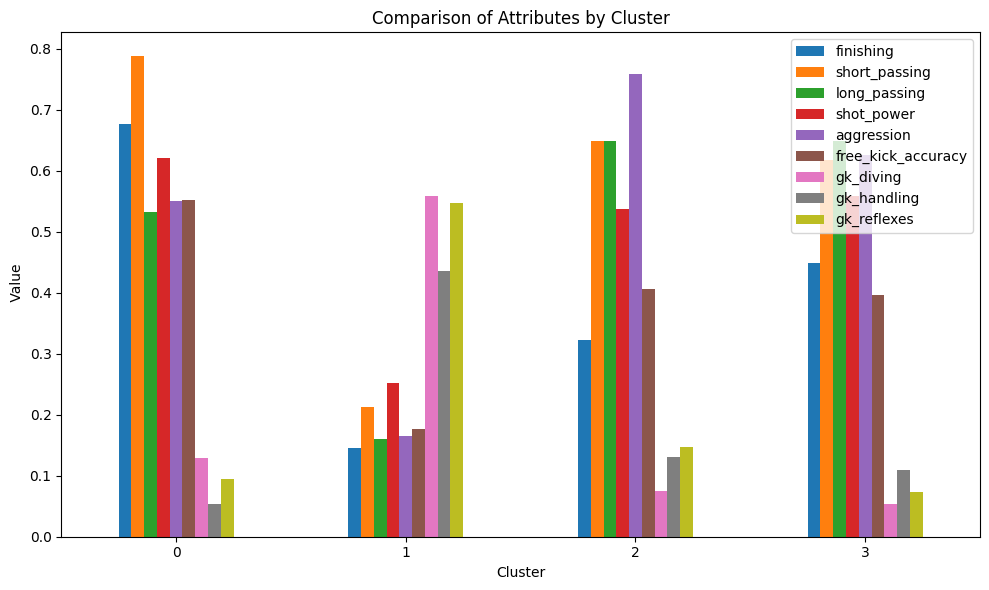

In [111]:
cluster_means.plot(kind='bar', figsize=(10, 6))

plt.title('Comparison of Attributes by Cluster')
plt.xlabel('Cluster')
plt.ylabel(' Value')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### groups:
#####   0==>milieu
#####   1==>gardien
#####   2==>defenseur
#####   3==>attaquant

           

In [106]:
def type_player(x):
    if x == 0 :
        return 'milieu'
    elif x == 1:
        return 'gardien'
    elif x == 2:
        return "defenseur"
    else:
        return 'attaquant'

check_df['type']=  check_df['clusters'].apply(type_player)


In [108]:
check_df.head(45)

,player_name,attacking_work_rate,positioning,penalties,finishing,crossing,short_passing,long_passing,shot_power,aggression,free_kick_accuracy,defensive_work_rate,gk_diving,gk_handling,gk_reflexes,clusters,type
0,Aaron Appindangoye,2.0,0.457447,0.489362,0.447917,0.510638,0.617021,0.648936,0.557895,0.626374,0.395833,2.0,0.053763,0.108696,0.073684,3,attaquant
1,Aaron Cresswell,2.0,0.585106,0.595745,0.510417,0.808511,0.680851,0.680851,0.715789,0.659341,0.697917,2.0,0.129032,0.054348,0.105263,3,attaquant
2,Aaron Doran,2.0,0.680851,0.648936,0.572917,0.723404,0.670213,0.627660,0.621053,0.582418,0.640625,2.0,0.150538,0.097826,0.115789,3,attaquant
3,Aaron Galindo,2.0,0.255319,0.372340,0.208333,0.595745,0.659574,0.617021,0.663158,0.692308,0.406250,2.0,0.139785,0.108696,0.094737,3,attaquant
4,Aaron Hughes,2.0,0.276596,0.446809,0.333333,0.468085,0.670213,0.574468,0.473684,0.648352,0.239583,2.0,0.064516,0.043478,0.094737,3,attaquant
5,Aaron Hunt,2.0,0.797872,0.840426,0.739583,0.808511,0.808511,0.691489,0.778947,0.538462,0.750000,2.0,0.139785,0.108696,0.136842,3,attaquant
6,Aaron Kuhl,2.0,0.393617,0.425532,0.322917,0.500000,0.648936,0.648936,0.536842,0.758242,0.406250,0.0,0.075269,0.130435,0.147368,2,defenseur
7,Aaron Lennon,0.0,0.787234,0.627660,0.677083,0.829787,0.787234,0.531915,0.621053,0.549451,0.552083,2.0,0.129032,0.054348,0.094737,0,milieu
8,Aaron Lennox,2.0,0.127660,0.414894,0.145833,0.117021,0.212766,0.159574,0.252632,0.164835,0.177083,2.0,0.559140,0.434783,0.547368,1,gardien
9,Aaron Meijers,2.0,0.638298,0.563830,0.427083,0.670213,0.712766,0.606383,0.673684,0.736264,0.677083,2.0,0.053763,0.141304,0.136842,3,attaquant
